In [1]:
from models.FineTuneTabPFNClassifier import FineTuneTabPFNClassifier
from models.MockTabPFN import MockTabPFN

In [2]:
from tabpfn import TabPFNClassifier

In [3]:
finetune = FineTuneTabPFNClassifier(TabPFNClassifier(), weights_path="")
print(finetune)

In [4]:
model = finetune.tabpfn_classifier.model[2]

In [5]:
model

TransformerModel(
  (transformer_encoder): TransformerEncoderDiffInit(
    (layers): ModuleList(
      (0-11): 12 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
        )
        (linear1): Linear(in_features=512, out_features=1024, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
        (linear2): Linear(in_features=1024, out_features=512, bias=True)
        (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.0, inplace=False)
        (dropout2): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (encoder): Linear(in_features=100, out_features=512, bias=True)
  (y_encoder): Linear(in_features=1, out_features=512, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=512, out_features=1024, bias=True)
    (1): GELU(approximate='none')

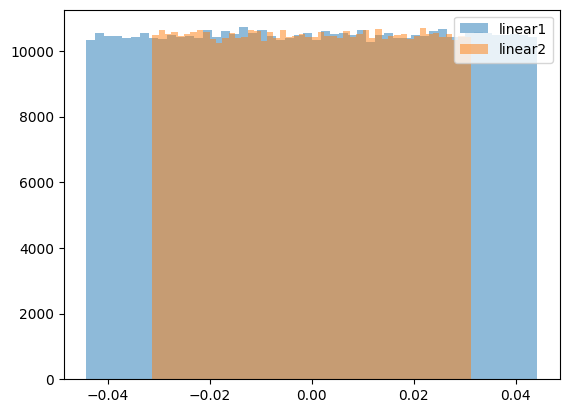

In [6]:
import matplotlib.pyplot as plt
plt.hist(model.transformer_encoder.layers[0].linear1.weight.detach().cpu().numpy().flatten(), bins=50, alpha=0.5, label='linear1')
plt.hist(model.transformer_encoder.layers[0].linear2.weight.detach().cpu().numpy().flatten(), bins=50, alpha=0.5, label='linear2')
plt.legend()
plt.show()